# Initial approximation

In [3]:
!head Campo_ComaCluster_TP2024_Topicos.dat

# objID                 ra                   dec                  z             rp                   dV                   Mr                    gr                    C           dn4000      logSSFR       logSM       
  1237667783373815894   190.36509242025133   22.93077982861949    0.035670865   17.26313891690042    3771.2595981359486   -20.668733995090065   0.4301385027959519    2.1917648   1.337758    -9.822911     9.939624    
  1237667783914684423   200.29327450857346   22.691551278673664   0.031448953   16.695315905655725   2504.6858561038975   -21.08690946816583    0.7010758296076993    2.8515496   1.293469    -9.765995     10.571441   
  1237667910060867716   196.25274943634537   23.49141297002381    0.034404837   11.831493435744028   3391.450978517533    -20.35240821291448    0.7083040696870277    2.8152108   1.7430892   -11.745109    10.202046   
  1237668273507663949   199.06978528401143   20.5682888292296     0.022718353   14.026255439924718   114.49404090642899   -18.288184

In [31]:
# As we can see the dat file is simple enough to read, lets use numpy directly
import numpy as np

In [32]:
filename = 'Campo_ComaCluster_TP2024_Topicos.dat'
rawdata = np.loadtxt(filename)
# Simple enough then the header is as follows
header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])

In [33]:
rawdata.shape,header.shape

((3436, 12), (12,))

In [34]:
# lets move the data to an easily understandable dictionary for manipulation :D
# then delete the raw data array to save memory
data = {}
i = 0
for col in header:
    data[col] = rawdata[:,i]
    i += 1
print('dictionary created')
del rawdata
del header

dictionary created


In [46]:
data

{'objID': array([1.23766778e+18, 1.23766778e+18, 1.23766791e+18, ...,
        1.23766744e+18, 1.23766744e+18, 1.23766774e+18]),
 'ra': array([190.36509242, 200.29327451, 196.25274944, ..., 194.50649495,
        194.6576242 , 190.47107725]),
 'dec': array([22.93077983, 22.69155128, 23.49141297, ..., 27.48966584,
        27.46395368, 22.34880181]),
 'z': array([0.03567087, 0.03144895, 0.03440484, ..., 0.02543061, 0.0209099 ,
        0.02320768]),
 'rp': array([17.26313892, 16.69531591, 11.83149344, ...,  1.19052802,
         0.90078389, 11.96794387]),
 'dV': array([3771.25959814, 2504.6858561 , 3391.45097852, ...,  699.18423861,
         657.03116387,   32.30493486]),
 'Mr': array([-20.668734  , -21.08690947, -20.35240821, ..., -20.86004954,
        -19.00411459, -19.0197875 ]),
 'gr': array([0.4301385 , 0.70107583, 0.70830407, ..., 0.70748191, 0.63790145,
        0.56356677]),
 'C': array([2.1917648, 2.8515496, 2.8152108, ..., 2.7672927, 2.4587986,
        2.324248 ]),
 'dn4000': array(

In [18]:
# Now with the data loaded, we will probably need some visualization tools ;D
import matplotlib.pyplot as plt

In [49]:
# Some general Coma Cluster data
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231

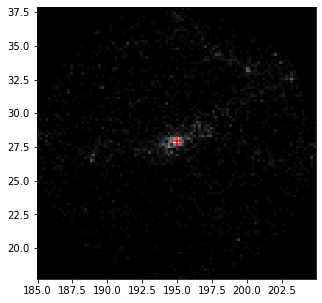

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.hist2d(data['ra'],data['dec'],weights=data['Mr'],bins=100,cmap='Greys')
ax.scatter(ra_coma,dec_coma,c='red',s=100,marker='+')
plt.show()

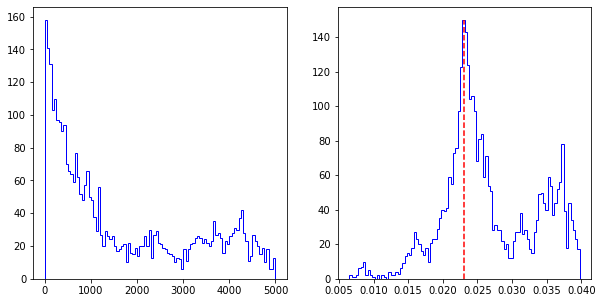

In [91]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(data['dV'],bins=100,histtype='step',color='blue')
axes[1].hist(data['z'],bins=100,histtype='step',color='blue')
axes[1].plot(np.full(10,z_coma),np.linspace(0,150,10),'--r')
plt.show()

In [87]:
# Now we have a reasonable overview of the raw data, to differentiate the cluster members
# Lets define a function for loading the data to dictionary, and then operate on that

# (I) Loading the data

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [143]:
def txt_to_dic(filename):
    """
    Converts the file to a dictionary, makes things easier to read.
    """
    dic = {}
    rawdata = np.loadtxt(filename)
    header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])
    i = 0
    for col in header:
        dic[col] = rawdata[:,i]
        i += 1
    return dic

In [216]:
data = txt_to_dic('Campo_ComaCluster_TP2024_Topicos.dat')
data.keys()

dict_keys(['objID', 'ra', 'dec', 'z', 'rp', 'dV', 'Mr', 'gr', 'C', 'dn4000', 'logSSFR', 'logSM'])

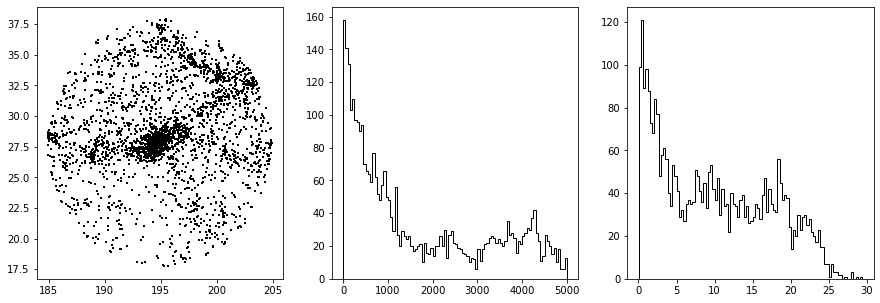

In [121]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].scatter(data['ra'],data['dec'],s=5,marker='+',color='black',zorder=1)
axes[1].hist(data['dV'],bins=100,histtype='step',color='black')
axes[2].hist(data['rp'],bins=100,histtype='step',color='black')
plt.show()

498 members found


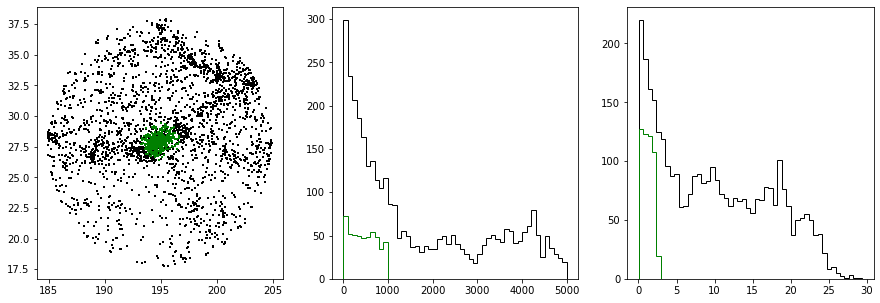

In [239]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].scatter(data['ra'],data['dec'],s=5,marker='+',color='black',zorder=1)
# filter by rp(projected distance[Mpc]) and dV under 1000[km/s]
filtr = ((data['rp'] <= 2.5) & (data['dV'] <= 1e3))
axes[0].scatter(data['ra'][filtr],data['dec'][filtr],s=5,marker='+',color='green',zorder=100)
# dV
hist,bins,_ = axes[1].hist(data['dV'],bins=50,histtype='step',color='black')
axes[1].hist(data['dV'][filtr],bins=bins,histtype='step',color='green')
# rp
hist,bins,_ = axes[2].hist(data['rp'],bins=50,histtype='step',color='black')
axes[2].hist(data['rp'][filtr],bins=bins,histtype='step',color='green')

print(len(data['ra'][filtr]), 'members found')
plt.show()

In [240]:
cluster_member_data = {}
for key in data.keys():
    cluster_member_data[key] = data[key][filtr]
cluster_member_data['count'] = len(cluster_member_data[key])

498 members found


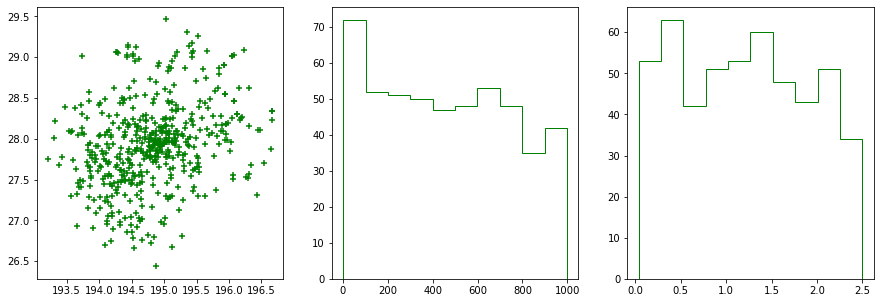

In [241]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].scatter(cluster_member_data['ra'],cluster_member_data['dec'],s=30,marker='+',color='green',zorder=100)
# dV
axes[1].hist(cluster_member_data['dV'],bins=10,histtype='step',color='green')
# rp
axes[2].hist(cluster_member_data['rp'],bins=10,histtype='step',color='green')
print(cluster_member_data['count'], 'members found')
plt.show()

In [242]:
# Lets save these important cluster members into a file, and hdf5 file that is
with h5py.File('cluster_member.hdf5','w') as file:
    for key in cluster_member_data.keys():
        file[key] = cluster_member_data[key]

In [243]:
# Lets save all data as well, maybe it will be useful
with h5py.File('Campo.hdf5','w') as file:
    for key in data.keys():
        file[key] = data[key]
    file['count'] = len(data[key])

# (II) Analysis, and questions

In [244]:
# Checking saved data
with h5py.File('Campo.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())
with h5py.File('cluster_member.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())

3436
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>
498
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>


(25.0, 30.0)

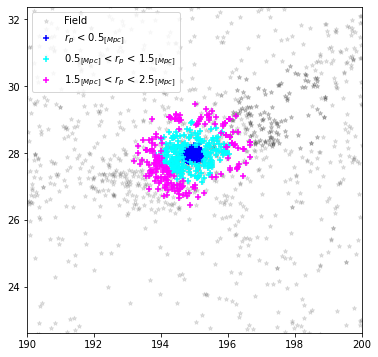

In [256]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
with h5py.File('Campo.hdf5','r') as data:
    ax.scatter(data['ra'],data['dec'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    ax.scatter(data['ra'][region1],data['dec'][region1],s=30,marker='+',color='blue',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    ax.scatter(data['ra'][region2],data['dec'][region2],s=30,marker='+',color='cyan',zorder=100,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    ax.scatter(data['ra'][region3],data['dec'][region3],s=30,marker='+',color='magenta',zorder=100,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')

ax.legend(loc='upper left')
ax.axis('equal')
ax.set_xlim(190,200)
ax.set_ylim(25,30)

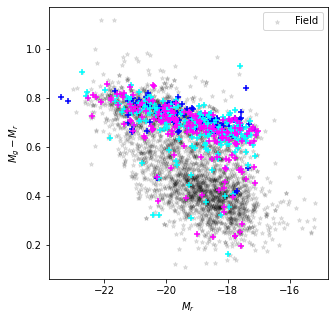

In [245]:
# Lets look at color-magnitude of the cluster members
fig, ax = plt.subplots(1,1,figsize=(5,5))
with h5py.File('Campo.hdf5','r') as data:
    ax.scatter(data['Mr'],data['gr'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    ax.scatter(data['Mr'][region1],data['gr'][region1],s=30,marker='+',color='blue',zorder=100,label='')
    ax.scatter(data['Mr'][region2],data['gr'][region2],s=30,marker='+',color='cyan',zorder=100,label='')
    ax.scatter(data['Mr'][region3],data['gr'][region3],s=30,marker='+',color='magenta',zorder=100,label='')

ax.legend()
ax.set_xlabel(r'$M_r$')
ax.set_ylabel(r'$M_g-M_r$')
fig.savefig('figures/cmd_cluster',dpi=300)

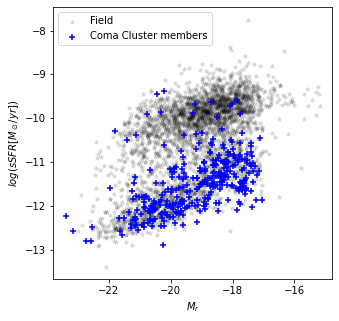

In [211]:
# Lets look at the log sSFR vs Mr
fig, ax = plt.subplots(1,1,figsize=(5,5))
with h5py.File('Campo.hdf5','r') as data:
    ax.scatter(data['Mr'][:],data['logSSFR'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    ax.scatter(data['Mr'][:],data['logSSFR'],s=30,marker='+',color='blue',zorder=100,label='Coma Cluster members')
ax.legend()
ax.set_xlabel(r'$M_r$')
ax.set_ylabel(r'$log(sSFR {[M_\odot / yr]})$')
fig.savefig('figures/cmd_cluster',dpi=300)

In [ ]:
# Lets look at the 